In [1]:
import nltk
nltk.download('gutenberg')

from nltk.corpus import gutenberg
file_names = gutenberg.fileids()

print(file_names)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/leecoder/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [4]:
doc_alice = gutenberg.open('carroll-alice.txt').read()
print('#Num of characters used:',len(doc_alice))
print('#Text sample:')
print(doc_alice[:500])

#Num of characters used: 144395
#Text sample:
[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy an


In [5]:
from nltk.tokenize import word_tokenize
tokens_alice = word_tokenize(doc_alice)

print('#Num of tokens used:',len(tokens_alice))
print('#Token sample:')
print(tokens_alice[:20])

#Num of tokens used: 33494
#Token sample:
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning']


In [6]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

# 모든 토큰에 대해 스테밍 실행
stem_tokens_alice = [stemmer.stem(token) for token in tokens_alice]

print('#nNum of stemmed tokens:',len(stem_tokens_alice))
print('#Token sample:')
print(stem_tokens_alice[:20])

#nNum of stemmed tokens: 33494
#Token sample:
['[', 'alic', "'s", 'adventur', 'in', 'wonderland', 'by', 'lewi', 'carrol', '1865', ']', 'chapter', 'i', '.', 'down', 'the', 'rabbit-hol', 'alic', 'wa', 'begin']


In [7]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# 모든 토큰에 대해 스테밍 실행
lem_tokens_alice = [lemmatizer.lemmatize(token) for token in tokens_alice]

print('#nNum of stemmed tokens:',len(lem_tokens_alice))
print('#Token sample:')
print(lem_tokens_alice[:20])

#nNum of stemmed tokens: 33494
#Token sample:
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'wa', 'beginning']


In [8]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w]{3,}") #3자 이상의 단어만 토큰으로 인정

reg_tokens_alice = tokenizer.tokenize(doc_alice.lower())
print('#Num of tokens with RegexpTokenizer:',len(reg_tokens_alice))
print('#Token sample:')
print(reg_tokens_alice[:20])

#Num of tokens with RegexpTokenizer: 21221
#Token sample:
['alice', 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'down', 'the', 'rabbit', 'hole', 'alice', 'was', 'beginning', 'get', 'very', 'tired', 'sitting', 'her', 'sister']


In [10]:
from nltk.corpus import stopwords
eng_stops = set(stopwords.words('english'))

result_alice = [word for word in reg_tokens_alice if word not in eng_stops]

print('#Num of tokens without stopwords:',len(result_alice))
print('#Token sample:')
print(result_alice[:20])

#Num of tokens without stopwords: 12105
#Token sample:
['alice', 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'rabbit', 'hole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book']


In [11]:
alice_word_count = dict()
for word in result_alice:
  alice_word_count[word] = alice_word_count.get(word,0)+1
  
print('#Num of unique tokens:',len(alice_word_count))
sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True)

print('#Top 20 words:')
for key in sorted_word_count[:20]:
  print(f'{repr(key)}:{alice_word_count[key]}',end=', ')

#Num of unique tokens: 2405
#Top 20 words:
'said':462, 'alice':398, 'little':128, 'one':104, 'know':88, 'like':85, 'would':83, 'went':83, 'could':77, 'queen':75, 'thought':74, 'time':71, 'see':67, 'well':63, 'king':63, 'turtle':59, 'began':58, 'way':56, 'hatter':56, 'mock':56, 

In [12]:
my_tag_set = ['NN','VB','VBD','JJ']
my_words = [word for word, tag in nltk.pos_tag(result_alice) if tag in my_tag_set]

alice_word_count = dict()
for word in my_words:
  alice_word_count[word] = alice_word_count.get(word,0)+1
  
print('#Num of unique tokens:',len(alice_word_count))

sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True)

print('#Top 20 words:')
for key in sorted_word_count[:20]:
  print(f'{repr(key)}:{alice_word_count[key]}',end=', ')


#Num of unique tokens: 1601
#Top 20 words:
'said':462, 'alice':301, 'little':125, 'went':83, 'queen':73, 'time':71, 'began':58, 'turtle':58, 'way':56, 'thought':54, 'mock':54, 'thing':49, 'voice':48, 'rabbit':47, 'head':47, 'gryphon':46, 'see':44, 'looked':43, 'got':43, 'hatter':42, 

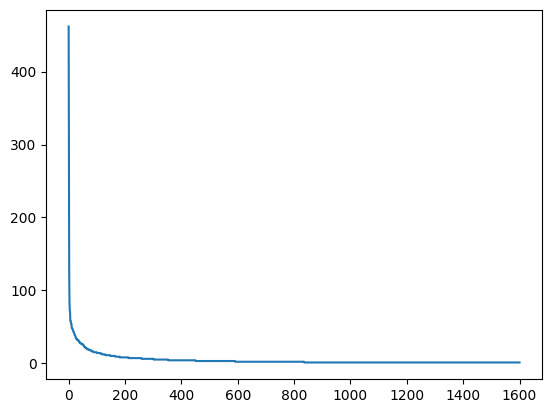

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# 정렬된 단어 리스트에 대해 빈도수를 가져와서 리스트 생성
w = [alice_word_count[key] for key in sorted_word_count]

plt.plot(w)
plt.show()

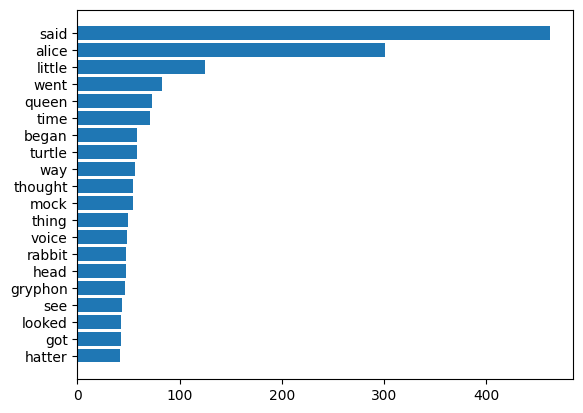

In [15]:
n = sorted_word_count[:20][::-1] #상위 20개 추출 -> 역순 정렬
w = [alice_word_count[key] for key in n] # 20개 단어 대한 빈고
plt.barh(range(len(n)),w,tick_label=n) # 수평 막대 그래프
plt.show()

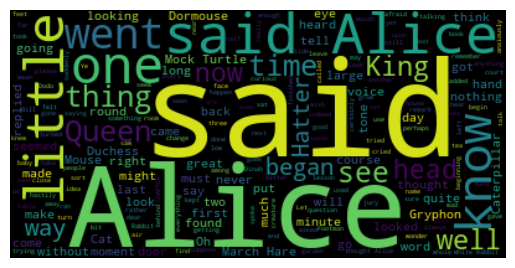

(200, 400, 3)

In [17]:
from wordcloud import WordCloud

# 워드 클라우드 이미지 생성

wordcloud = WordCloud().generate(doc_alice)

plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear') #이미지를 출력
plt.show()

wordcloud.to_array().shape

In [20]:
import numpy as np
from PIL import Image

alice_mask = np.array(Image.open("alice_mask.png"))

wc = WordCloud(background_color="white", 
               max_words=30,
               mask=alice_mask,
               contour_width = 3,
               contour_color = 'steelblue')

wc.generate_from_frequencies(alice_word_count)
wc.to_file("alice.png")

plt.figure()
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'alice_mask.png'

In [21]:
from konlpy.corpus import kolaw
const_doc = kolaw.open('constitution.txt').read()

print(type(const_doc))
print(len(const_doc))
print(const_doc[:600])

<class 'str'>
18884
대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.
②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.
  제3조 대한민


In [27]:
from konlpy.tag import Okt
jvm_path = "/Library/Java/JavaVirtualMachines/zulu-15.jdk/Contents/Home/bin/java"
okt = Okt(jvmpath=jvm_path)

tokens_const = okt.morphs(const_doc)
print('#Num of tokens:',len(tokens_const))
print
print(tokens_const[:100])

#Num of tokens: 8796
['대한민국', '헌법', '\n\n', '유구', '한', '역사', '와', '전통', '에', '빛나는', '우리', '대', '한', '국민', '은', '3', '·', '1', '운동', '으로', '건립', '된', '대한민국', '임시정부', '의', '법', '통과', '불의', '에', '항거', '한', '4', '·', '19', '민주', '이념', '을', '계승', '하고', ',', '조국', '의', '민주', '개혁', '과', '평화', '적', '통일', '의', '사명', '에', '입', '각하', '여', '정의', '·', '인도', '와', '동포', '애', '로써', '민족', '의', '단결', '을', '공고', '히', '하고', ',', '모든', '사회', '적', '폐습', '과', '불의', '를', '타파', '하며', ',', '자율', '과', '조화', '를', '바탕', '으로', '자유민주', '적', '기', '본', '질서', '를', '더욱', '확고히', '하여', '정치', '·', '경제', '·', '사회', '·']


In [28]:
tokens_const = okt.nouns(const_doc)
print('#토큰의 수:',len(tokens_const))
print(tokens_const[:100])

#토큰의 수: 3882
['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '법', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '입', '각하', '정의', '인도', '동포', '애', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '안', '국민', '생활', '향상', '기하', '밖', '항구', '세계', '평화', '인류', '공영', '이바지', '함', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '것', '다짐', '제정', '차', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '제', '장', '강', '제', '대한민국', '민주공화국', '대한민국']


In [29]:
tokens_const = [token for token in tokens_const if len(token)>1]
print(len(tokens_const))
print(tokens_const[:100])

3013
['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '각하', '정의', '인도', '동포', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '국민', '생활', '향상', '기하', '항구', '세계', '평화', '인류', '공영', '이바지', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '다짐', '제정', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '대한민국', '민주공화국', '대한민국', '주권', '국민', '모든', '권력', '국민', '대한민국', '국민', '요건', '법률', '국가', '법률', '재외국민']


[('조직', 18), ('국회의원', 18), ('임기', 18), ('직무', 19), ('국무총리', 19), ('자유', 20), ('정부', 20), ('선거', 20), ('임명', 20), ('권리', 21), ('의원', 21), ('사항', 23), ('기타', 26), ('모든', 37), ('헌법', 53), ('국민', 61), ('국회', 68), ('국가', 73), ('대통령', 83), ('법률', 127)]


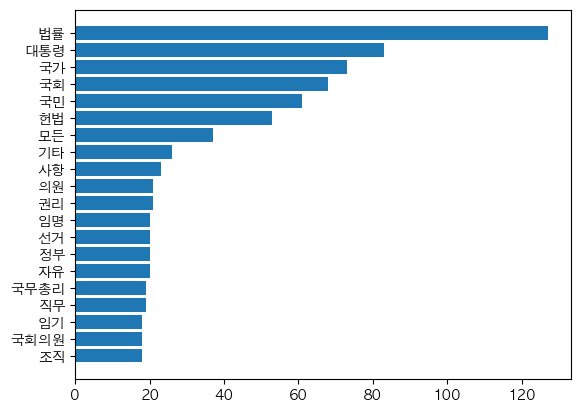

In [30]:
from matplotlib import font_manager, rc

font_name = 'AppleGothic'
rc('font',family=font_name)

const_cnt={}
for word in tokens_const:
  const_cnt[word] = const_cnt.get(word,0) + 1

def word_graph(cnt, max_words=10):
  
  sorted_w = sorted(cnt.items(), key=lambda kv: kv[1])
  print(sorted_w[-max_words:])
  n, w = zip(*sorted_w[-max_words:])
  
  plt.barh(range(len(n)),w,tick_label=n)
  #plt.savefig('bar.png) 필요한 경우 그래프를 이미지로 저장
  
  plt.show()

word_graph(const_cnt, max_words=20)

In [33]:
wordcloud = WordCloud(font_name = 'AppleGothic').generate(const_doc)

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

TypeError: WordCloud.__init__() got an unexpected keyword argument 'font_name'